<a href="https://colab.research.google.com/github/Dhanya-Zac/Codebytes/blob/main/Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pdt=pd.read_csv('product.csv')
pdt.head()
pdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            27 non-null     int64 
 1   brand                 27 non-null     object
 2   flavour               27 non-null     object
 3   volume_per_joghurt_g  27 non-null     int64 
 4   packsize              27 non-null     int64 
 5   product_id            27 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.4+ KB


In [113]:

# Check for missing values
print(pdt.isnull().sum())

# Check for duplicate values
print(pdt.duplicated().sum())


Unnamed: 0              0
brand                   0
flavour                 0
volume_per_joghurt_g    0
packsize                0
product_id              0
dtype: int64
0


In [114]:
pdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            27 non-null     int64 
 1   brand                 27 non-null     object
 2   flavour               27 non-null     object
 3   volume_per_joghurt_g  27 non-null     int64 
 4   packsize              27 non-null     int64 
 5   product_id            27 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.4+ KB


In [115]:
sales=pd.read_csv('sales.csv')
sales.head()

,Unnamed: 0,date,product_id,price,units
0,0,2020-01-01,0,4.65,1126.0
1,1,2020-01-02,0,4.76,1205.0
2,2,2020-01-03,0,5.22,1007.0
3,3,2020-01-04,0,5.45,1282.0
4,4,2020-01-05,0,3.33,1037.0


In [116]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  260 non-null    int64  
 1   date        260 non-null    object 
 2   product_id  260 non-null    int64  
 3   price       260 non-null    float64
 4   units       260 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 10.3+ KB


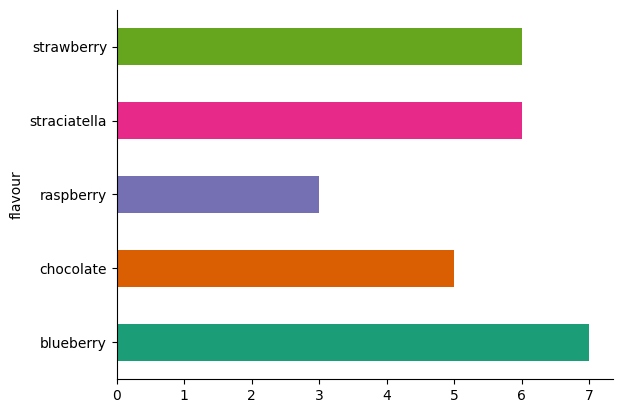

In [117]:
#Frequency distribution of variables in Product data
pdt.groupby('flavour').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [118]:
packsize_counts = pdt.groupby('packsize').size().reset_index(name='counts')
print(packsize_counts)


   packsize  counts
0         1       7
1         6      20


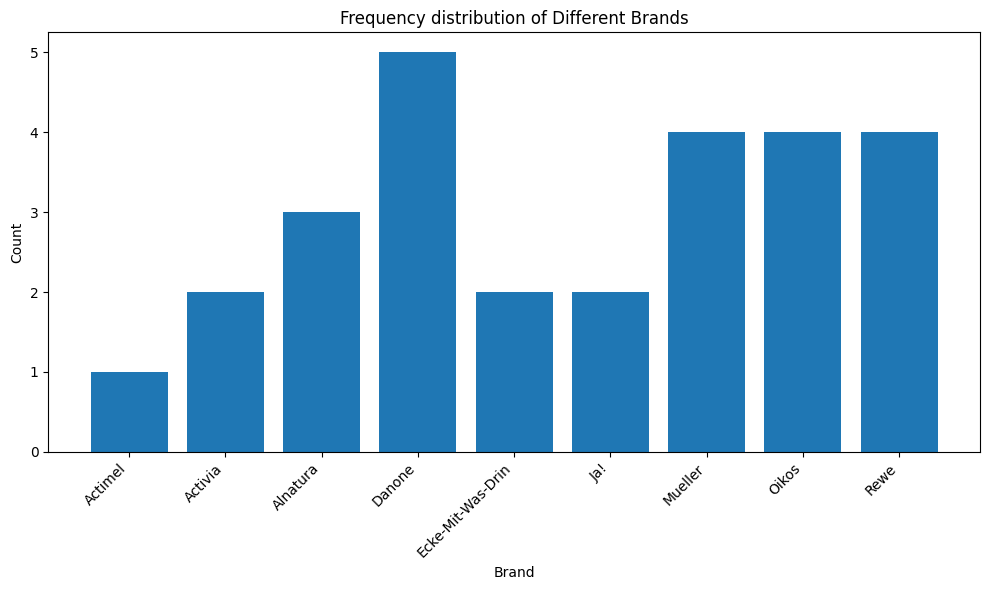

In [146]:
brand_counts = pdt.groupby('brand').size().reset_index(name='counts')
plt.figure(figsize=(10, 6))
plt.bar(brand_counts['brand'], brand_counts['counts'])
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Frequency distribution of Different Brands')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [120]:
brand_counts = pdt.groupby('brand').size().reset_index(name='counts')
print(brand_counts)

               brand  counts
0            Actimel       1
1            Activia       2
2           Alnatura       3
3             Danone       5
4  Ecke-Mit-Was-Drin       2
5                Ja!       2
6            Mueller       4
7              Oikos       4
8               Rewe       4


In [129]:
merged_data = pd.merge(sales, pdt, on='product_id')
print(merged_data.isnull().sum())

Unnamed: 0_x            0
date                    0
product_id              0
price                   0
units                   0
Unnamed: 0_y            0
brand                   0
flavour                 0
volume_per_joghurt_g    0
packsize                0
dtype: int64


In [159]:
merged_data.columns
merged_data['date'] = pd.to_datetime(merged_data['date'])
print(merged_data.dtypes)

Unnamed: 0_x                     int64
date                    datetime64[ns]
product_id                       int64
price                          float64
units                          float64
Unnamed: 0_y                     int64
brand                           object
flavour                         object
volume_per_joghurt_g             int64
packsize                         int64
revenue                        float64
dtype: object


In [160]:
merged_data.head(20)

,Unnamed: 0_x,date,product_id,price,units,Unnamed: 0_y,brand,flavour,volume_per_joghurt_g,packsize,revenue
0,0,2020-01-01,0,4.65,1126.0,0,Mueller,blueberry,150,6,5235.90
1,1,2020-01-02,0,4.76,1205.0,0,Mueller,blueberry,150,6,5735.80
2,2,2020-01-03,0,5.22,1007.0,0,Mueller,blueberry,150,6,5256.54
3,3,2020-01-04,0,5.45,1282.0,0,Mueller,blueberry,150,6,6986.90
4,4,2020-01-05,0,3.33,1037.0,0,Mueller,blueberry,150,6,3453.21
5,5,2020-01-06,0,4.06,1239.0,0,Mueller,blueberry,150,6,5030.34
6,6,2020-01-07,0,4.17,1780.0,0,Mueller,blueberry,150,6,7422.60
7,7,2020-01-08,0,3.87,1453.0,0,Mueller,blueberry,150,6,5623.11
8,8,2020-01-09,0,4.40,1430.0,0,Mueller,blueberry,150,6,6292.00
9,9,2020-01-10,0,6.11,1142.0,0,Mueller,blueberry,150,6,6977.62


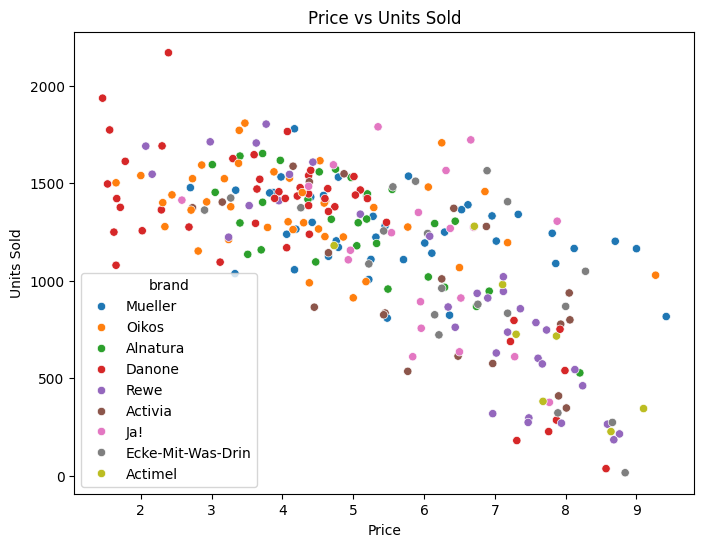

In [161]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='units', data=merged_data, hue='brand')
plt.title("Price vs Units Sold")
plt.xlabel("Price")
plt.ylabel("Units Sold")
plt.show()



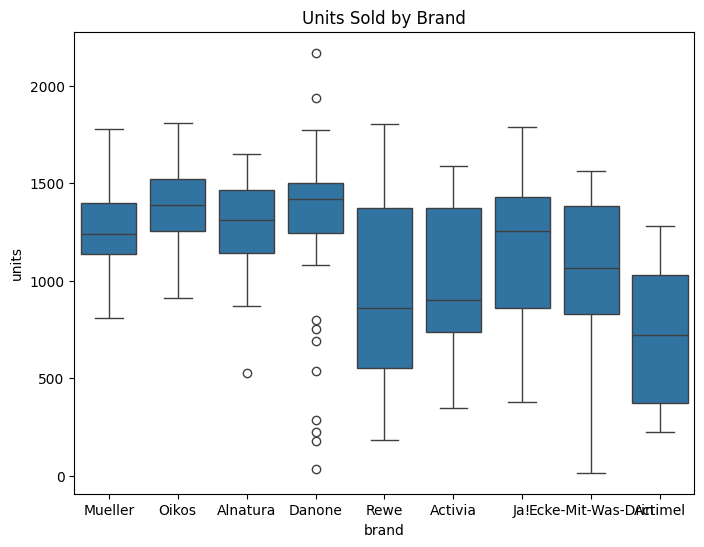

In [162]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='brand', y='units', data=merged_data)
plt.title("Units Sold by Brand")
plt.show()



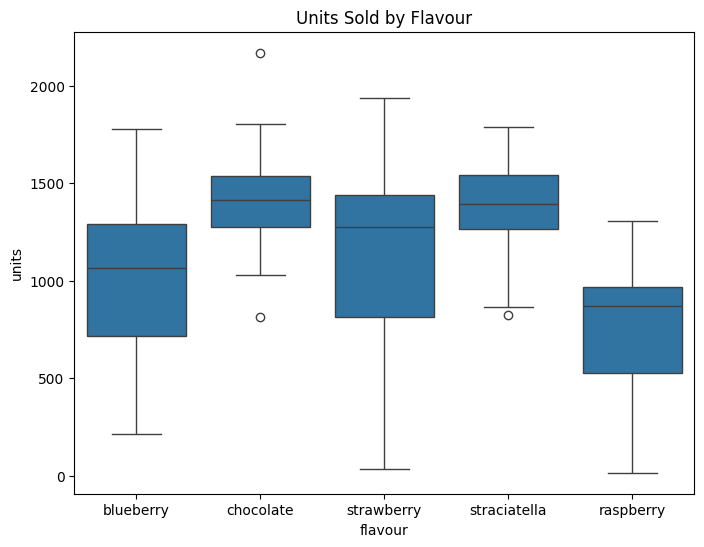

In [143]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='flavour', y='units', data=merged_data)
plt.title("Units Sold by Flavour")
plt.show()


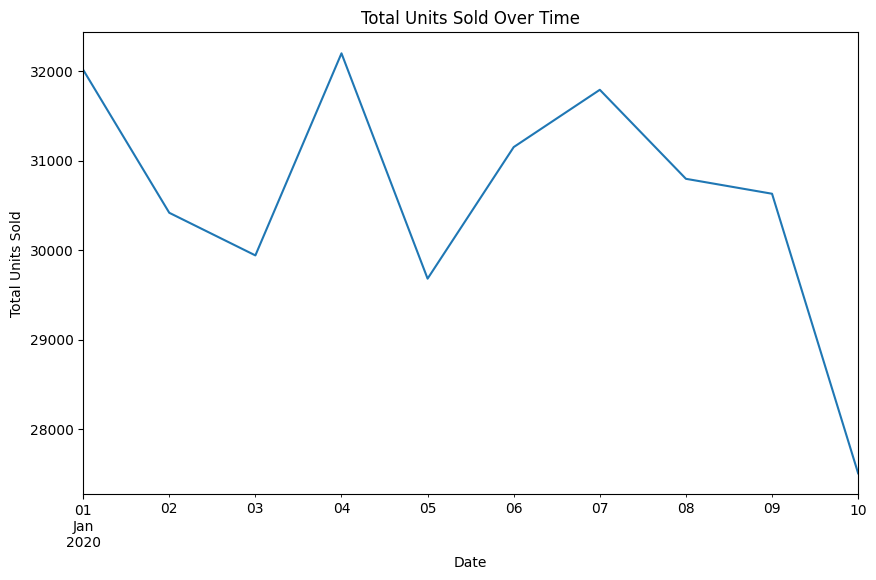

In [163]:
plt.figure(figsize=(10, 6))
merged_data.groupby('date')['units'].sum().plot()
plt.title("Total Units Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Total Units Sold")
plt.show()

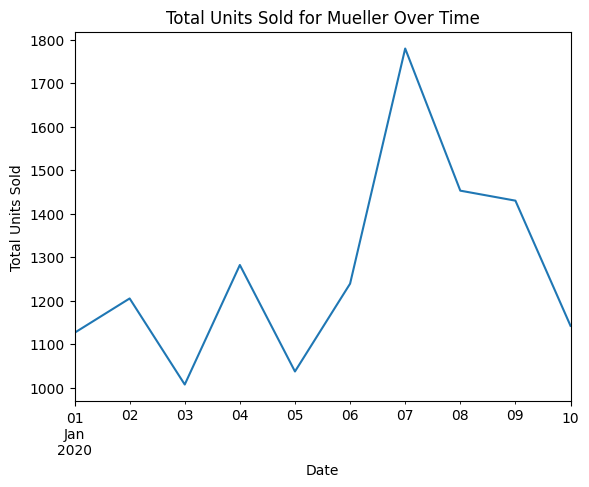

In [164]:
product_data = merged_data[merged_data['product_id'] == 0]
product_data.groupby('date')['units'].sum().plot()
plt.title(f"Total Units Sold for Mueller Over Time")
plt.xlabel("Date")
plt.ylabel("Total Units Sold")
plt.show()

In [165]:
#print(sales['date'])

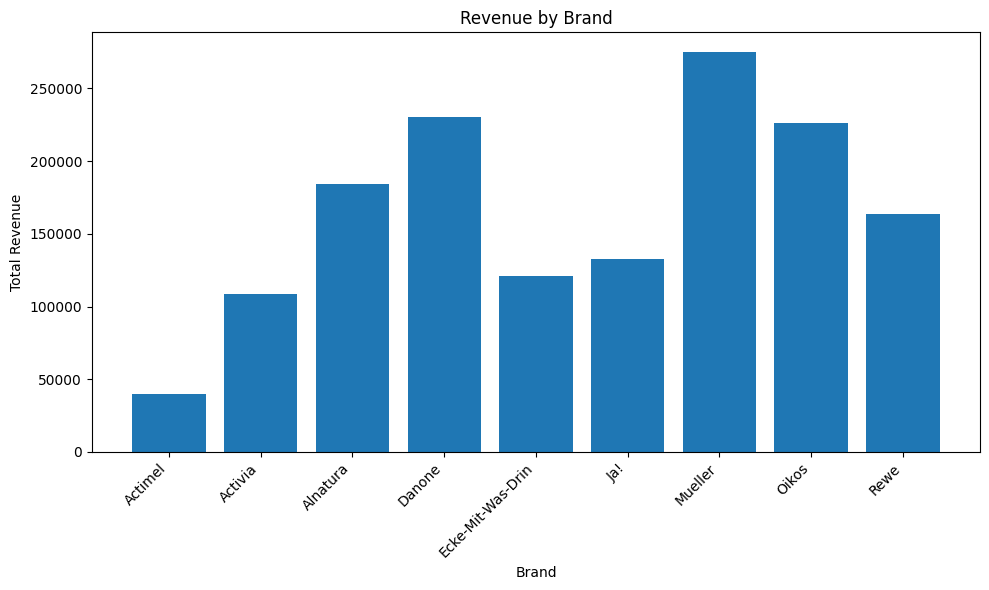

In [166]:

merged_data['revenue'] = merged_data['price'] * merged_data['units']
brand_revenue = merged_data.groupby('brand')['revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(brand_revenue['brand'], brand_revenue['revenue'])
plt.xlabel('Brand')
plt.ylabel('Total Revenue')
plt.title('Revenue by Brand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


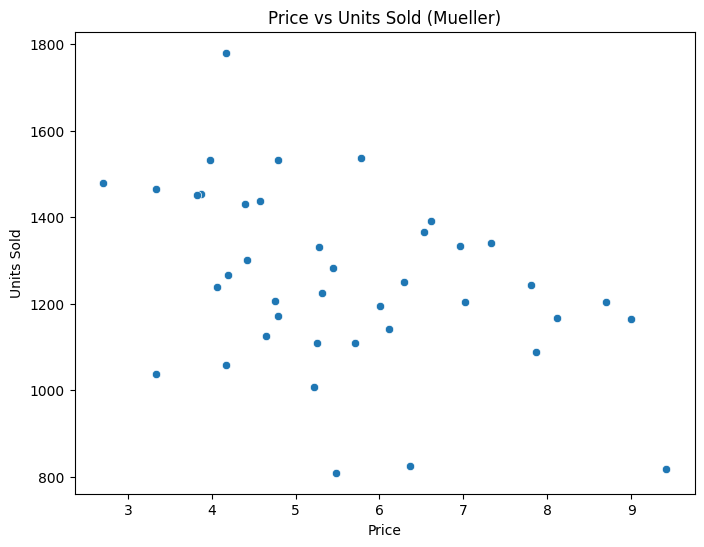

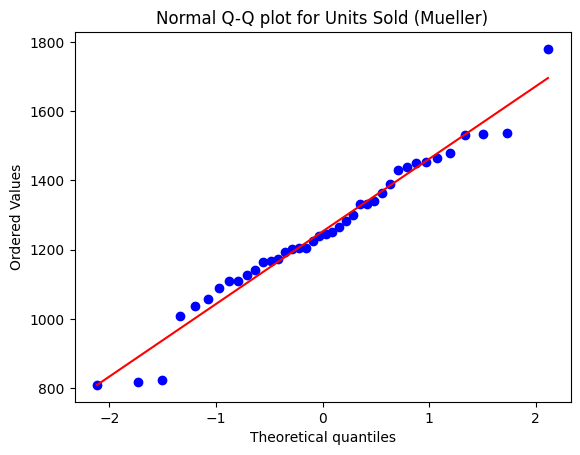

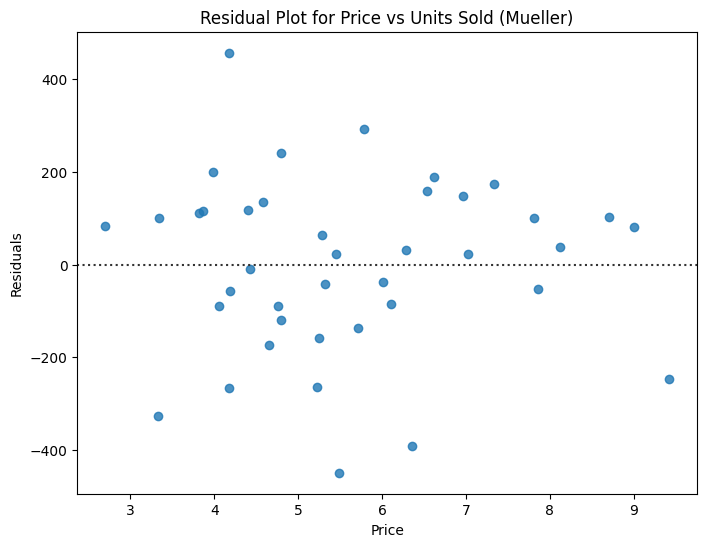

In [167]:
import scipy.stats as stats
mueller_data = merged_data[merged_data['brand'] == 'Mueller']
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='units', data=mueller_data)
plt.title("Price vs Units Sold (Mueller)")
plt.xlabel("Price")
plt.ylabel("Units Sold")
plt.show()

# Check for normality of units sold
stats.probplot(mueller_data['units'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot for Units Sold (Mueller)")
plt.show()

# Check for homoscedasticity (constant variance)
plt.figure(figsize=(8, 6))
sns.residplot(x='price', y='units', data=mueller_data)
plt.title("Residual Plot for Price vs Units Sold (Mueller)")
plt.xlabel("Price")
plt.ylabel("Residuals")
plt.show()



In [168]:
# Log-transform 'price' and 'units' for modeling elasticity
merged_data['log_price'] = np.log(merged_data['price'])
merged_data['log_units'] = np.log(merged_data['units'])

In [169]:
merged_data = pd.get_dummies(merged_data, columns=['brand', 'flavour'], drop_first=True)
# Feature selection: price, volume, packsize, brand, flavour
X = merged_data[['log_price', 'volume_per_joghurt_g', 'packsize'] + list(merged_data.columns[merged_data.columns.str.contains('brand|flavour')])]
y = merged_data['log_units']

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [171]:
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
# Output evaluation
print("\nModel Performance:")
print(f"Model RMSE: {rmse}")
print(f"Model R-squared: {r2}")
print(f"Baseline RMSE: {baseline_rmse}")


Model Performance:
Model RMSE: 0.7003860080448325
Model R-squared: 0.3551319186200722
Baseline RMSE: 0.9058777814490017


In [172]:
#Mueller_data
# Log-transform 'price' and 'units' for modeling elasticity
mueller_data['log_price'] = np.log(mueller_data['price'])
mueller_data['log_units'] = np.log(mueller_data['units'])
mueller_data = pd.get_dummies(mueller_data, columns=['brand', 'flavour'], drop_first=True)
# Feature selection: price, volume, packsize, brand, flavour
X = mueller_data[['log_price', 'volume_per_joghurt_g', 'packsize'] + list(mueller_data.columns[mueller_data.columns.str.contains('brand|flavour')])]
y = mueller_data['log_units']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))

# Output evaluation
print("\nModel Performance:")
print(f"Model RMSE: {rmse}")
print(f"Model R-squared: {r2}")
print(f"Baseline RMSE: {baseline_rmse}")


Model Performance:
Model RMSE: 0.17541856143767984
Model R-squared: -0.8171817628874047
Baseline RMSE: 0.13035127516849343
